In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from urllib2 import urlopen
import math 

from datetime import timedelta, date
import nuclear_test
import auroral_electrojet as ae;
import dst;

import matplotlib.patches as patches

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
# Get the lists of all NTs 
nts = nuclear_test.nuclear_test_data();
geomag_ae = ae.auroral_electrojet();
print geomag_ae.hourly_folder;
geomag_dst = dst.dst();
print geomag_dst.hourly_folder;

# ae.download_byminute(1980)
# print ae.data_byhour['801111'][12];
# print np.mean(ae.data_byminute['801111-12'])  


ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/AURORAL_ELECTROJET/HOURLY/
ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/DST/


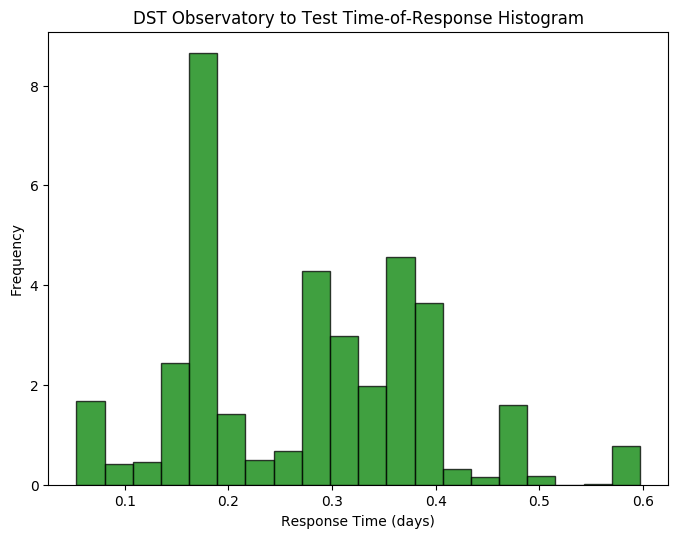

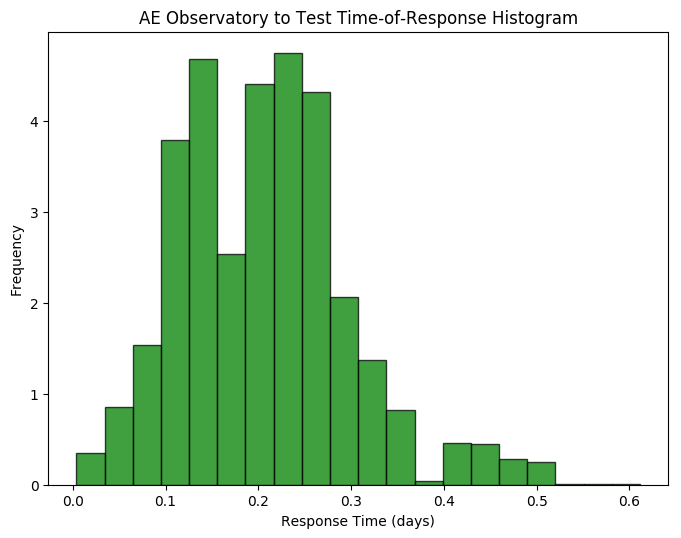

In [41]:
# How far away are the tests from the geomagnetic observatories? 
# Should we expect a short delay in the cause and effect? 
# Main Result: ... Not really, at acoustic speeds it looks like it's at most half a day

import geopy.distance

#Observatory 	 Geographic Lat.(°N) 	Geographic Long.(°E) 	 Geomagnetic Lat.(°N) 	 Geomagnetic Long.(°E)
auroral_obs =[[68.36,18.82,66.04,115.08], 
            [73.55,80.57,63.02,161.57],
            [77.72,104.28,66.26,176.46],
            [71.58,129.00,60.44,191.41],
            [66.17,190.17,61.79,237.10], 
            [71.30,203.25,68.54,241.15],
            [64.87,212.17,64.63,256.52],
            [62.40,245.60,69.00,292.80],
            [58.80,265.90,68.70,322.77],
            [55.27,282.22,66.58,347.36],
            [61.20,314.16,71.21,36.79],
            [64.18,338.30,70.22,71.04]];


def distance_latlong(lat1,lon1,lat2,lon2):
    R = 6373.0
    lat1 = math.radians(52.2296756)
    lon1 = math.radians(21.0122287)
    lat2 = math.radians(52.406374)
    lon2 = math.radians(16.9251681)
#    lat1 = math.radians(lat1)
#    lon1 = math.radians(lon1)
#    lat2 = math.radians(lat2)
 #   lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance*1000;# 
    

dst_obs=[[36.23,140.19], [21.32, 202.00], [18.11, 293.85], [34.43, 19.23]];

time_of_response = [];
v = 500;#m/s - an Alfven wave propagating
v = 340;#m/s - an acoustic wave propagating
for kt in nts.tests:
    if((nts.tests[kt].latitude!=0) and (nts.tests[kt].latitude!=0)):
        for i in np.arange(0,4):
            # print auroral_obs[i][0],auroral_obs[i][1];
            coords_1 = (nts.tests[kt].latitude, nts.tests[kt].longitude);
            coords_2 = (dst_obs[i][0],dst_obs[i][1]);
            earth_distance = geopy.distance.vincenty(coords_1, coords_2).km
            time_of_response.append(1000*earth_distance/(60*60*24*v));
        
# the histogram of the data

plt.figure(figsize=(8, 6), dpi=100, )
# plt.grid();
n, bins, patches = plt.hist(time_of_response, 20, normed=1, facecolor='green', edgecolor = 'k',alpha=0.75);

plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.title('DST Observatory to Test Time-of-Response Histogram')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()
    
time_of_response = [];
v = 500;#m/s - an Alfven wave propagating
v = 340;#m/s - an acoustic wave propagating
for kt in nts.tests:
    if((nts.tests[kt].latitude!=0) and (nts.tests[kt].latitude!=0)):
        for i in np.arange(0,12):
            # print auroral_obs[i][0],auroral_obs[i][1];
            coords_1 = (nts.tests[kt].latitude, nts.tests[kt].longitude);
            coords_2 = (auroral_obs[i][0],auroral_obs[i][1]);
            earth_distance = geopy.distance.vincenty(coords_1, coords_2).km
            time_of_response.append(1000*earth_distance/(60*60*24*v));
        
# the histogram of the data

plt.figure(figsize=(8, 6), dpi=100, )
# plt.grid();
n, bins, patches = plt.hist(time_of_response, 20, normed=1, facecolor='green', edgecolor = 'k',alpha=0.75);

plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.title('AE Observatory to Test Time-of-Response Histogram')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
plt.show()






Number of DST peaks 110
Number of AE peaks 111
DST Background Event Rate 0.0125570776256 hour^-1$
AE Background Event Rate 0.0126712328767 hour^-1
Max. fraction of DST peaks if every peak was preceeded by one NT 0.236363636364


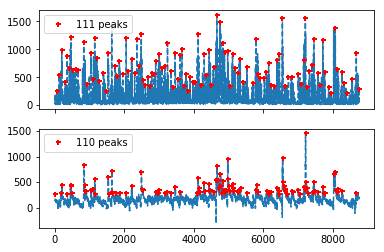

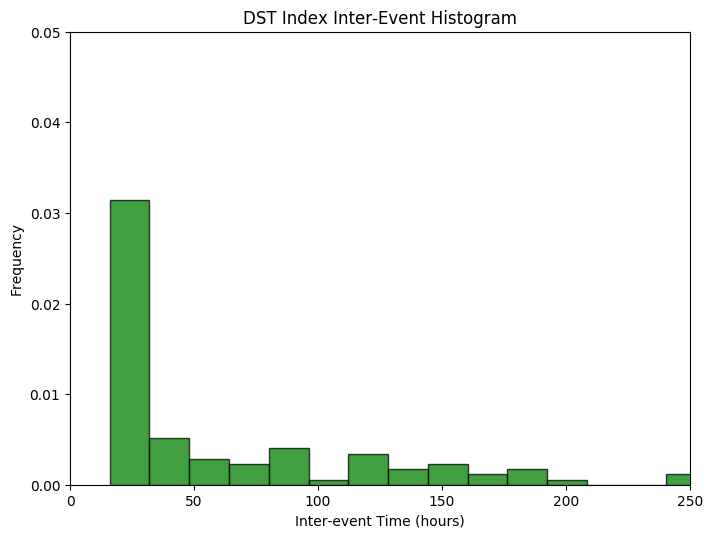

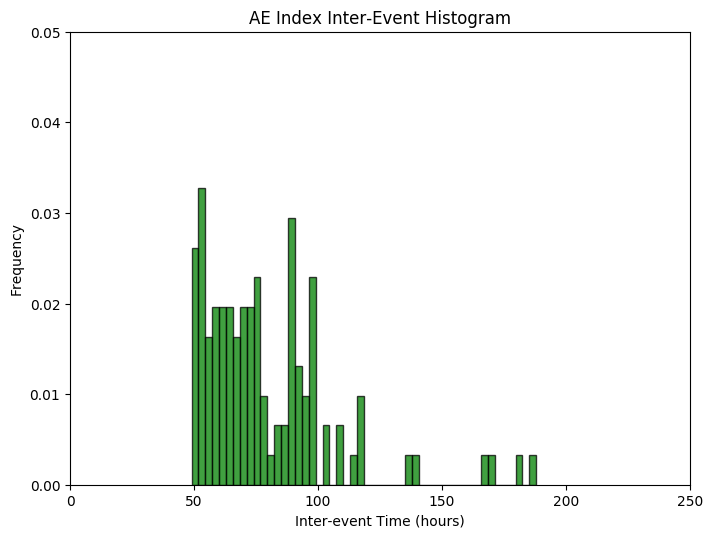

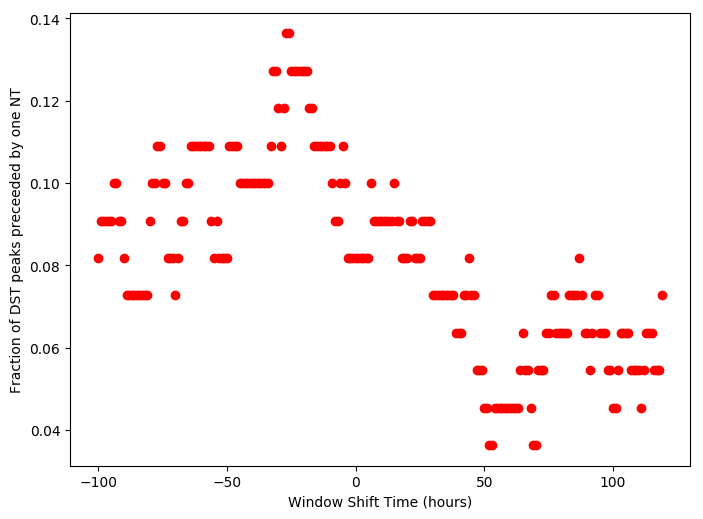

In [138]:
# What are the number of peaks in the geomagnetic data? 
# Result : Initially threshold dependent but of the order of 150 per year

# What is the background event rate of peaks? 
# Result : of the order of 0.01 to 0.03 per hour, around 0.3 per day

# What fraction of tests have an associated geomagnetic index peak? 
# Result : No evidence of pre-cursor effect (to be expected). ~15% for one year (1961)

import peakutils
from peakutils.plot import plot as pplot

# Get a test with timing information 
# plt.figure(figsize=(8, 6), dpi=200);
year = 1961;

# Grab the hourly data for both indices - do this once
#geomag_ae.download_byhour(year);
#geomag_dst.download_byhour(year);

# Rearrange the data for a full year 
start_date = date(year, 1, 1);
end_date = date(year+1, 1, 1);

plot_start_day = 0;
plot_end_day = 370;

ae_data = [];
dst_data = [];

for single_date in daterange(start_date, end_date):
    day = single_date.day;
    month = single_date.month;
    doy = single_date.timetuple().tm_yday;
    if((doy>plot_start_day) and (doy<plot_end_day)):
        for hr in np.arange(0,24):
            #if(hr%2==0):
            datecode = str(year-1900)+str(month).zfill(2) + str(day).zfill(2);
            ae_data.append(float(geomag_ae.data_byhour[datecode][hr]));
            dst_data.append(float(-5.0*geomag_dst.data_byhour[datecode][hr]));
            
# Remove the baseline from dst
base = peakutils.baseline(np.array(dst_data), 4);
            
# Now find the peaks 
th = 1.0*np.std(ae_data)/(max(ae_data) - min(ae_data));
ae_peaks = peakutils.indexes(np.array(ae_data), thres=th,min_dist=48);

th = 5.0*np.std(dst_data)/(max(dst_data) - min(dst_data));
dst_peaks = peakutils.indexes(np.array(dst_data)-base, thres=th,min_dist=15);

plt.figure(figsize=(8, 6), dpi=200);
f, axarr = plt.subplots(2, sharex=True)
plt.sca(axarr[0]);
pplot(np.arange(0,len(ae_data)),np.array(ae_data), np.array(ae_peaks));
plt.sca(axarr[1]);
pplot(np.arange(0,len(dst_data)),np.array(dst_data)-base, np.array(dst_peaks));
# plt.plot(np.arange(0,len(ae_data)),ae_data,'ro');

# Now plot the time interval histogram 
#del_time_ae = [];
#del_time_dst = [];
#for i in np.arange(1,len(dst_peaks)):
#    del_time_dst.append(dst_peaks[i] - dst_peaks[i-1]);# in hours
#for i in np.arange(1,len(ae_peaks)):
#    del_time_ae.append(ae_peaks[i] - ae_peaks[i-1]);# in hours
#plt.figure(figsize=(8, 6), dpi=100);
#n, bins, patches = plt.hist(del_time_dst, 30, normed=1, facecolor='green', edgecolor = 'k',alpha=0.75);
#plt.axis([0, 250, 0, 0.05]);
#plt.xlabel('Inter-event Time (hours)')
#plt.ylabel('Frequency')
#plt.title('DST Index Inter-Event Histogram')


#plt.figure(figsize=(8, 6), dpi=100);
#n, bins, patches = plt.hist(del_time_ae, 50, normed=1, facecolor='green', edgecolor = 'k',alpha=0.75);
#plt.axis([0, 250, 0, 0.05]);
#plt.xlabel('Inter-event Time (hours)')
#plt.ylabel('Frequency')
#plt.title('AE Index Inter-Event Histogram')

# Estimate the rate of peak events
print 'Number of DST peaks ' + str(len(dst_peaks))
print 'Number of AE peaks ' + str(len(ae_peaks))
print 'DST Background Event Rate ' + str(len(dst_peaks)/(365.0*24.0)) + ' hour^-1$'
print 'AE Background Event Rate '+ str(len(ae_peaks)/(365.0*24.0)) + ' hour^-1'

# Coincidence rate of tests and ae/dst data
window = 25;#hours (i.e. 24 hours from timing resolution of test information + 1 for the response effect)
coinc_r = [];
for tau in np.arange(-100,120,1):
    coinc_events = 0;
    for i in dst_peaks:
        test_count = 0;
        inner_sum = 0;
        for j in nts.tests:
            test = (nts.tests[j].date_time.year == year) and (nts.tests[j].yield_kt>0);
            if(test):
                test_count+=1
                doy = nts.tests[j].date_time.timetuple().tm_yday;
                if((doy>0) and (doy<370)):
                    dst_event_time = float(i);# Data is in hours already 
                    nt_event_time = doy*24.0;
                    diff_events = (-nt_event_time + dst_event_time-tau);
                    if((diff_events<window) and (diff_events>0)):
                            inner_sum += 1;
        if(inner_sum>0):
            coinc_events += 1;

    coinc_events /= float(len(dst_peaks));
    coinc_r.append(coinc_events);
    
plt.figure(figsize=(8, 6), dpi=100);
plt.xlabel('Window Shift Time (hours)')
plt.ylabel('Fraction of DST peaks preceeded by one NT')
plt.title('')
plt.plot(np.arange(-100,120,1), coinc_r,'ro');

print 'Max. fraction of DST peaks if every peak was preceeded by one NT ' + str(float(test_count)/float(len(dst_peaks)))


#### Estimate the coincidence distribution (e.g. arxiv 1508.03534)





ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/AURORAL_ELECTROJET/ONE_MINUTE/ae_1995_minute.txt


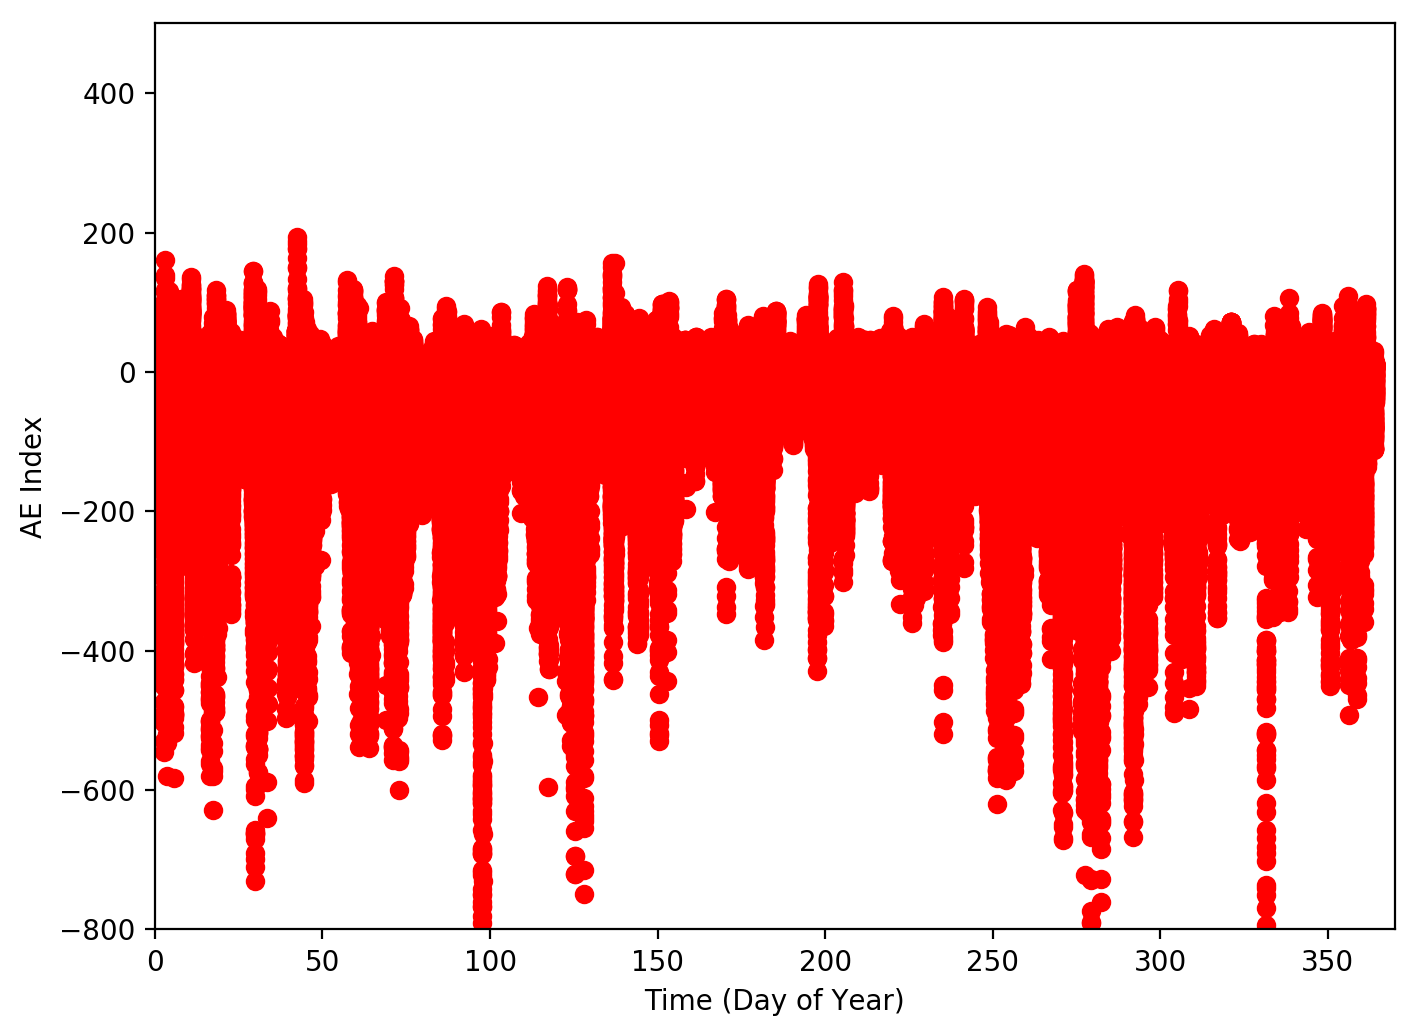

In [4]:
# This plots the AU index (not AE) and plots lines on the graph to shoe the tests



# Get a test with timing information 
plt.figure(figsize=(8, 6), dpi=200);
year = 1995;

# Grab the hourly 
geomag_ae.download_byminute(year);

start_date = date(year, 1, 1)
end_date = date(year, 12, 30)

plot_start_day = 0;
plot_end_day = 370;

for single_date in daterange(start_date, end_date):
    day = single_date.day;
    month = single_date.month;
    doy = single_date.timetuple().tm_yday;
    if((doy>plot_start_day) and (doy<plot_end_day)):
        for hr in np.arange(0,24):
            #if(hr%2==0):
            datecode = str(year-1900)+str(month).zfill(2) + str(day).zfill(2) + '-'+str(hr).zfill(2);
            mins = (np.arange(0,60)+hr*60+24*60*doy)/(60.0*24.0);
            plt.plot(mins, geomag_ae.data_byminute[datecode],'ro');


# Plot on it the tests 
axes = plt.gca()
for kt in nts.tests:
    test = (nts.tests[kt].date_time.year == year) and (nts.tests[kt].yield_kt>100);
    if(test):
        doy = nts.tests[kt].date_time.timetuple().tm_yday;
        
        if((doy>plot_start_day) and (doy<plot_end_day)):
            
            print nts.tests[kt].date_time;
            plt.text(doy-0.4, 400, str(nts.tests[kt].yield_kt) + ' kt', rotation=90);
            plt.text(doy+0.2, 400, 'Lat: ' + str(nts.tests[kt].latitude) + ' Lon: ' + str(nts.tests[kt].longitude) , rotation=90);
        
            x = [doy, doy];
            y = [-1500, 500];
            plt.plot(x,y,'k-');

            axes.add_patch(
                patches.Rectangle(
                    (doy-0.5, -1500), 1, 2000,
                        alpha=0.2)
            );
        
axes.set_xlim([plot_start_day,plot_end_day])
axes.set_ylim([-800,500])
plt.xlabel('Time (Day of Year)')
plt.ylabel('AE Index');


ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/DST/dst1962.txt


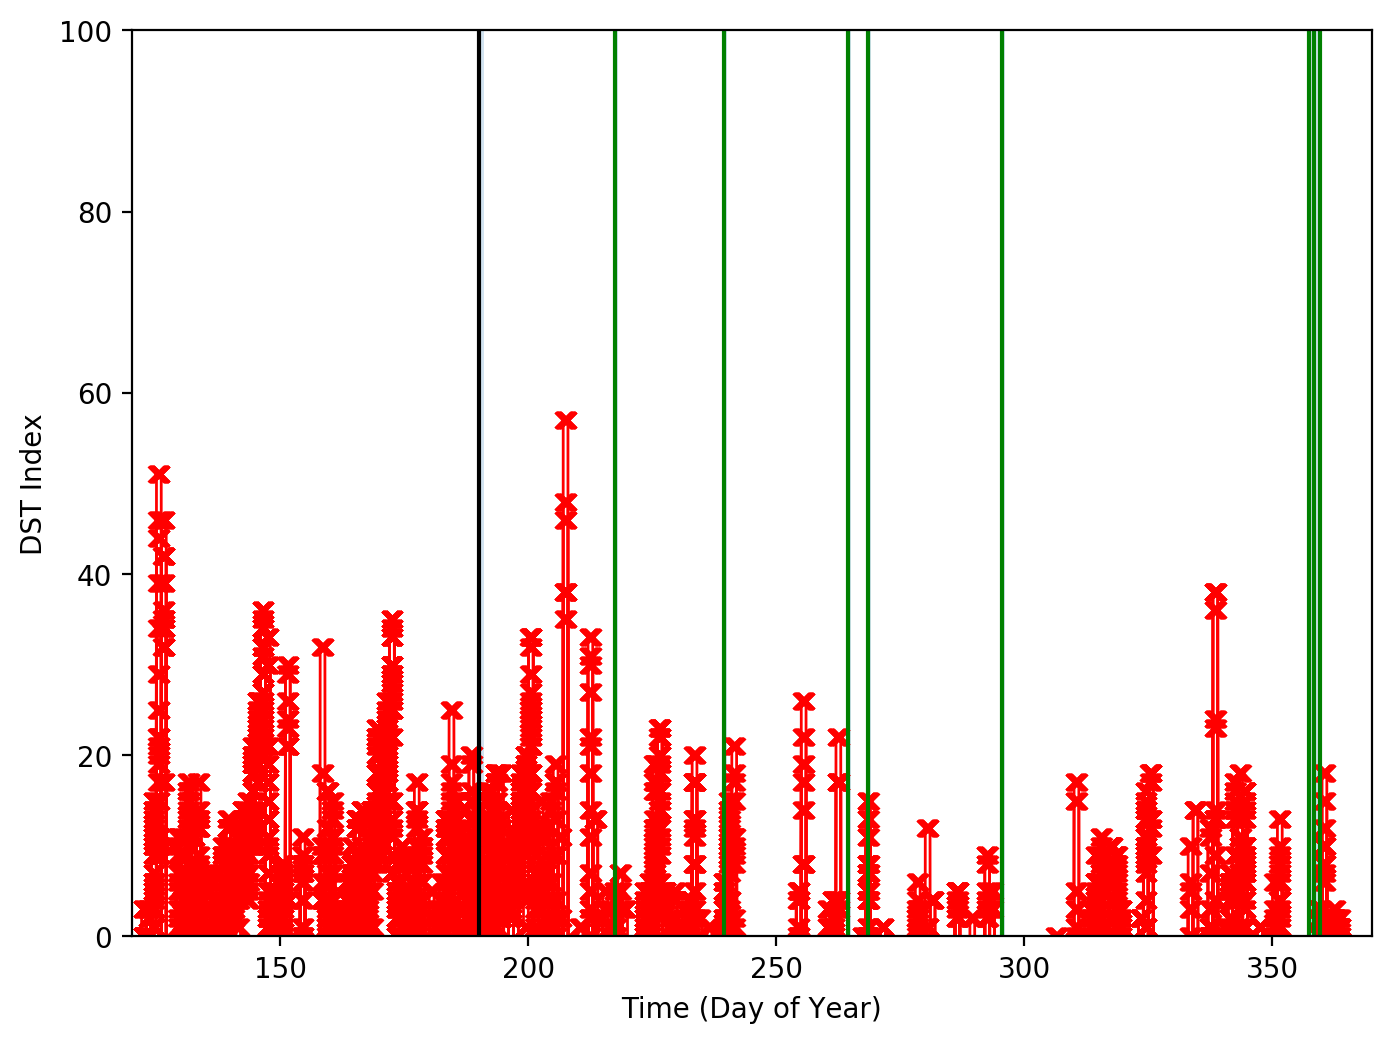

In [8]:
# Similar plot but hourly as the hourly dataset has the actual AE index rather than AU. 



# Get a test with timing information 

plt.figure(figsize=(8, 6), dpi=200);

year = 1962;

# Grab the hourly 
geomag_dst.download_byhour(year);

start_date = date(year, 1, 1)
end_date = date(year, 12, 30)

plot_start_day = 120;
plot_end_day = 370;

times = [];
data_byhour = [];

for single_date in daterange(start_date, end_date):
    day = single_date.day;
    month = single_date.month;
    doy = single_date.timetuple().tm_yday;
    if((doy>plot_start_day) and (doy<plot_end_day)):
        for hr in np.arange(0,24):
            #if(hr%2==0):
            datecode = str(year-1900)+str(month).zfill(2) + str(day).zfill(2);
            mins = (np.arange(0,60)+hr*60+24*60*doy)/(60.0*24.0);
            times.append(doy+(hr/24.0));
            data_byhour.append(geomag_dst.data_byhour[datecode]);
    
plt.plot(times,data_byhour,'rx-', linewidth=1);

# Plot on it the tests 
axes = plt.gca()
for kt in nts.tests:
    test = (nts.tests[kt].date_time.year == year) and (nts.tests[kt].yield_kt>1000);
    if(test):
        doy = nts.tests[kt].date_time.timetuple().tm_yday;
        
        if((doy>plot_start_day) and (doy<plot_end_day)):

            axes.add_patch(
                patches.Rectangle(
                    (doy, 0), 1, 100,
                        alpha=0.2)
            );
        
            # plt.text(doy-0.4, 400, str(nts.tests[kt].yield_kt) + ' kt', rotation=90);
            # plt.text(doy+0.2, 400, 'Lat: ' + str(nts.tests[kt].latitude) + ' Lon: ' + str(nts.tests[kt].longitude) , rotation=90);
                
            x = [doy, doy];
            y = [0, 100];

            if(nts.tests[kt].date_time.hour==0):
                plt.plot(x,y,'k-');
            else:
                explosion_time = nts.tests[kt].date_time.hour;
                plt.plot([doy+explosion_time/24.0, doy+explosion_time/24.0],y,'g-');

axes.set_xlim([plot_start_day,plot_end_day])
axes.set_ylim([0,100])
plt.xlabel('Time (Day of Year)')
plt.ylabel('DST Index');


In [ ]:
# Similar plot but hourly as the hourly dataset has the DST



# Get a test with timing information 

plt.figure(figsize=(8, 6), dpi=200, )

year = 1958;

# Grab the hourly 
geomag_ae.download_byhour(year);

start_date = date(year, 1, 1)
end_date = date(year, 12, 30)

plot_start_day = 120;
plot_end_day = 370;

times = [];
data_byhour = [];

for single_date in daterange(start_date, end_date):
    day = single_date.day;
    month = single_date.month;
    doy = single_date.timetuple().tm_yday;
    if((doy>plot_start_day) and (doy<plot_end_day)):
        for hr in np.arange(0,24):
            #if(hr%2==0):
            datecode = str(year-1900)+str(month).zfill(2) + str(day).zfill(2);
            mins = (np.arange(0,60)+hr*60+24*60*doy)/(60.0*24.0);
            times.append(doy+(hr/24.0));
            data_byhour.append(geomag_ae.data_byhour[datecode][hr]);
    
plt.plot(times,data_byhour,'rx-', linewidth=1);

# Plot on it the tests 
axes = plt.gca()
for kt in nts.tests:
    test = (nts.tests[kt].date_time.year == year) and (nts.tests[kt].yield_kt>100);
    if(test):
        doy = nts.tests[kt].date_time.timetuple().tm_yday;
        
        if((doy>plot_start_day) and (doy<plot_end_day)):

            axes.add_patch(
                patches.Rectangle(
                    (doy, 0), 1, 1500,
                        alpha=0.2)
            );
        
            # plt.text(doy-0.4, 400, str(nts.tests[kt].yield_kt) + ' kt', rotation=90);
            # plt.text(doy+0.2, 400, 'Lat: ' + str(nts.tests[kt].latitude) + ' Lon: ' + str(nts.tests[kt].longitude) , rotation=90);
                
            x = [doy, doy];
            y = [0, 1500];

            if(nts.tests[kt].date_time.hour==0):
                plt.plot(x,y,'k-');
            else:
                explosion_time = nts.tests[kt].date_time.hour;
                plt.plot([doy+explosion_time/24.0, doy+explosion_time/24.0],y,'g-');

axes.set_xlim([plot_start_day,plot_end_day])
axes.set_ylim([0,1500])
plt.xlabel('Time (Day of Year)')
plt.ylabel('AE Index');
